In [2]:
# Import necessary modules
import torch
import torch.optim as optim
import os
import sys
import configparser
import matplotlib.pyplot as plt

# Add the parent directory to path if needed
sys.path.append("..") # Adjust as needed for your directory structure

# Import your custom modules
from vae_class_model import VariationalAutoEncoder_with_classifier, vae_loss_function
from dataloader import load_vae_fraud_data
from trainer import VAETrainer, train_vae_classifier

# Path to configuration file
config_path = "../configs/vae_classifier/vae_classifier.config"

# Load the configuration
config = configparser.ConfigParser()
config.read(config_path)



/home/alexkstern/miniconda3/envs/credit_vae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['../configs/vae_classifier/vae_classifier.config']

In [3]:
# Print the configuration to verify
print("Configuration loaded from:", config_path)
for section in config.sections():
    print(f"[{section}]")
    for key, value in config[section].items():
        print(f"  {key} = {value}")

# Load the data
data = load_vae_fraud_data(config_path=config_path)
print(f"\nInput dimension: {data['input_dim']}")

# Check dataset sizes
for split, loader in data['dataloaders'].items():
    batch = next(iter(loader))
    features, labels = batch
    print(f"{split} dataset: {len(loader.dataset)} samples, batch shape: {features.shape}")



Configuration loaded from: ../configs/vae_classifier/vae_classifier.config
[VAE]
  input_dim = 30
  hidden_dim = 200
  z_dim = 10
  recon_weight = 1.0
  kl_weight = 1.0
[DataLoader]
  dataset_name = stanpony/european_credit_card_fraud_dataset
  exclude_cols = original_index, Class
  normalize_cols = Time, Amount
  batch_size = 8
  shuffle = True
  num_workers = 4
  normalize = True
  class_filter = None
[Trainer]
  num_epochs = 50
  save_dir = saved_models/fraud/v1
  validate_every = 1
  save_best_only = True
  early_stopping = True
  patience = 15
[WandB]
  use_wandb = False
  project = fraud-vae
  name = vae-fraud-training
  entity = alexkstern
  tags = fraud, vae
Loaded configuration from ../configs/vae_classifier/vae_classifier.config
Using all classes: 12378 samples
Normalization statistics: {'Time': {'mean': 93950.12481822589, 'std': 47453.14126639548}, 'Amount': {'mean': 89.01172645015349, 'std': 241.8942806171708}}
Using all classes: 12378 samples
Using all classes: 1547 sample

In [4]:
# Initialize model
model = VariationalAutoEncoder_with_classifier(
    input_dim=data['input_dim'],
    hidden_dim=int(config['VAE']['hidden_dim']),
    z_dim=int(config['VAE']['z_dim'])
)

# Set up optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create trainer
trainer = VAETrainer(
    model=model,
    dataloaders=data['dataloaders'],
    loss_fn=vae_loss_function,
    optimizer=optimizer,
    config=dict(config),  # Convert configparser to dict
    device=device
)


Using device: cpu


In [5]:
# Train the model (you can adjust num_epochs)
history = trainer.train(num_epochs=10)  # Start with a smaller number to test


Epoch 1/10
Train Epoch 0:
  Loss: 298.0933
  Recon Loss: 251.2667
  KL Loss: 46.5502
  Class Loss: 0.2764
  Accuracy: 0.9708
  Precision: 0.1439
  Recall: 0.1362
  F1: 0.1385
  AUC: 0.1955
  Confusion Matrix:
[[11791   209]
 [  146   232]]
Val Epoch 0:
  Loss: 356.0044
  Recon Loss: 283.1069
  KL Loss: 72.7190
  Class Loss: 0.1785
  Accuracy: 0.9871
  Precision: 0.1624
  Recall: 0.1649
  F1: 0.1632
  AUC: 0.2040
  Confusion Matrix:
[[1497    3]
 [   8   39]]
Validation loss improved from inf to 356.0044
Saved best model checkpoint to saved_models/vae_classifier/best_model.pt
Epoch 2/10
Train Epoch 1:
  Loss: 252.2243
  Recon Loss: 198.6139
  KL Loss: 53.4448
  Class Loss: 0.1656
  Accuracy: 0.9845
  Precision: 0.1835
  Recall: 0.1768
  F1: 0.1788
  AUC: 0.2119
  Confusion Matrix:
[[11901    99]
 [   75   303]]
Val Epoch 1:
  Loss: 382.5439
  Recon Loss: 326.3829
  KL Loss: 56.0120
  Class Loss: 0.1489
  Accuracy: 0.9871
  Precision: 0.1607
  Recall: 0.1649
  F1: 0.1622
  AUC: 0.2062
  

In [9]:
# Import necessary modules
import torch
import torch.optim as optim
import os
import sys
import configparser
import matplotlib.pyplot as plt

# Add the parent directory to path if needed
sys.path.append("..") # Adjust as needed for your directory structure

# Import your custom modules
from vae_class_model import VariationalAutoEncoder_with_classifier, vae_loss_function
from dataloader import load_vae_fraud_data
from trainer import VAETrainer, train_vae_classifier

# Path to configuration file
config_path = "../configs/vae_classifier/vae_classifier.config"

# Load the configuration
config = configparser.ConfigParser()
config.read(config_path)

# Load the data
print("\nLoading data...")
data = load_vae_fraud_data(config_path=config_path)

# Initialize model
model = VariationalAutoEncoder_with_classifier(
    input_dim=data['input_dim'],
    hidden_dim=int(config['VAE']['hidden_dim']),
    z_dim=int(config['VAE']['z_dim'])
)

# Set up optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create trainer
trainer = VAETrainer(
    model=model,
    dataloaders=data['dataloaders'],
    loss_fn=vae_loss_function,
    optimizer=optimizer,
    config=dict(config),  # Convert configparser to dict
    device=device
)

# Train the model 
history = trainer.train(num_epochs=10)  # Adjust as needed




Loading data...
Loaded configuration from ../configs/vae_classifier/vae_classifier.config
Using all classes: 12378 samples
Normalization statistics: {'Time': {'mean': 93950.12481822589, 'std': 47453.14126639548}, 'Amount': {'mean': 89.01172645015349, 'std': 241.8942806171708}}
Using all classes: 12378 samples
Using all classes: 1547 samples
Using all classes: 1548 samples
Using device: cpu
Epoch 1/10
Train Epoch 0:
  Loss: 298.8105
  Recon Loss: 252.8351
  KL Loss: 45.7029
  Class Loss: 0.2724
  Accuracy: 0.9703
  Precision: 0.1477
  Recall: 0.1436
  F1: 0.1439
  AUC: 0.2036
  Confusion Matrix:
[[11772   228]
 [  135   243]]
Val Epoch 0:
  Loss: 544.6462
  Recon Loss: 443.3690
  KL Loss: 101.0947
  Class Loss: 0.1825
  Accuracy: 0.9903
  Precision: 0.1675
  Recall: 0.1701
  F1: 0.1684
  AUC: 0.1937
  Confusion Matrix:
[[1498    2]
 [  10   37]]
Validation loss improved from inf to 544.6462
Saved best model checkpoint to saved_models/vae_classifier/best_model.pt
Epoch 2/10
Train Epoch 

Evaluating model on test dataset...
Test Epoch 9:
  Loss: 329.1846
  Recon Loss: 275.7731
  KL Loss: 53.3085
  Class Loss: 0.1031
  Accuracy: 0.9878
  Precision: 0.1856
  Recall: 0.1804
  F1: 0.1821
  AUC: 0.2009
  Confusion Matrix:
[[1487   13]
 [   4   44]]


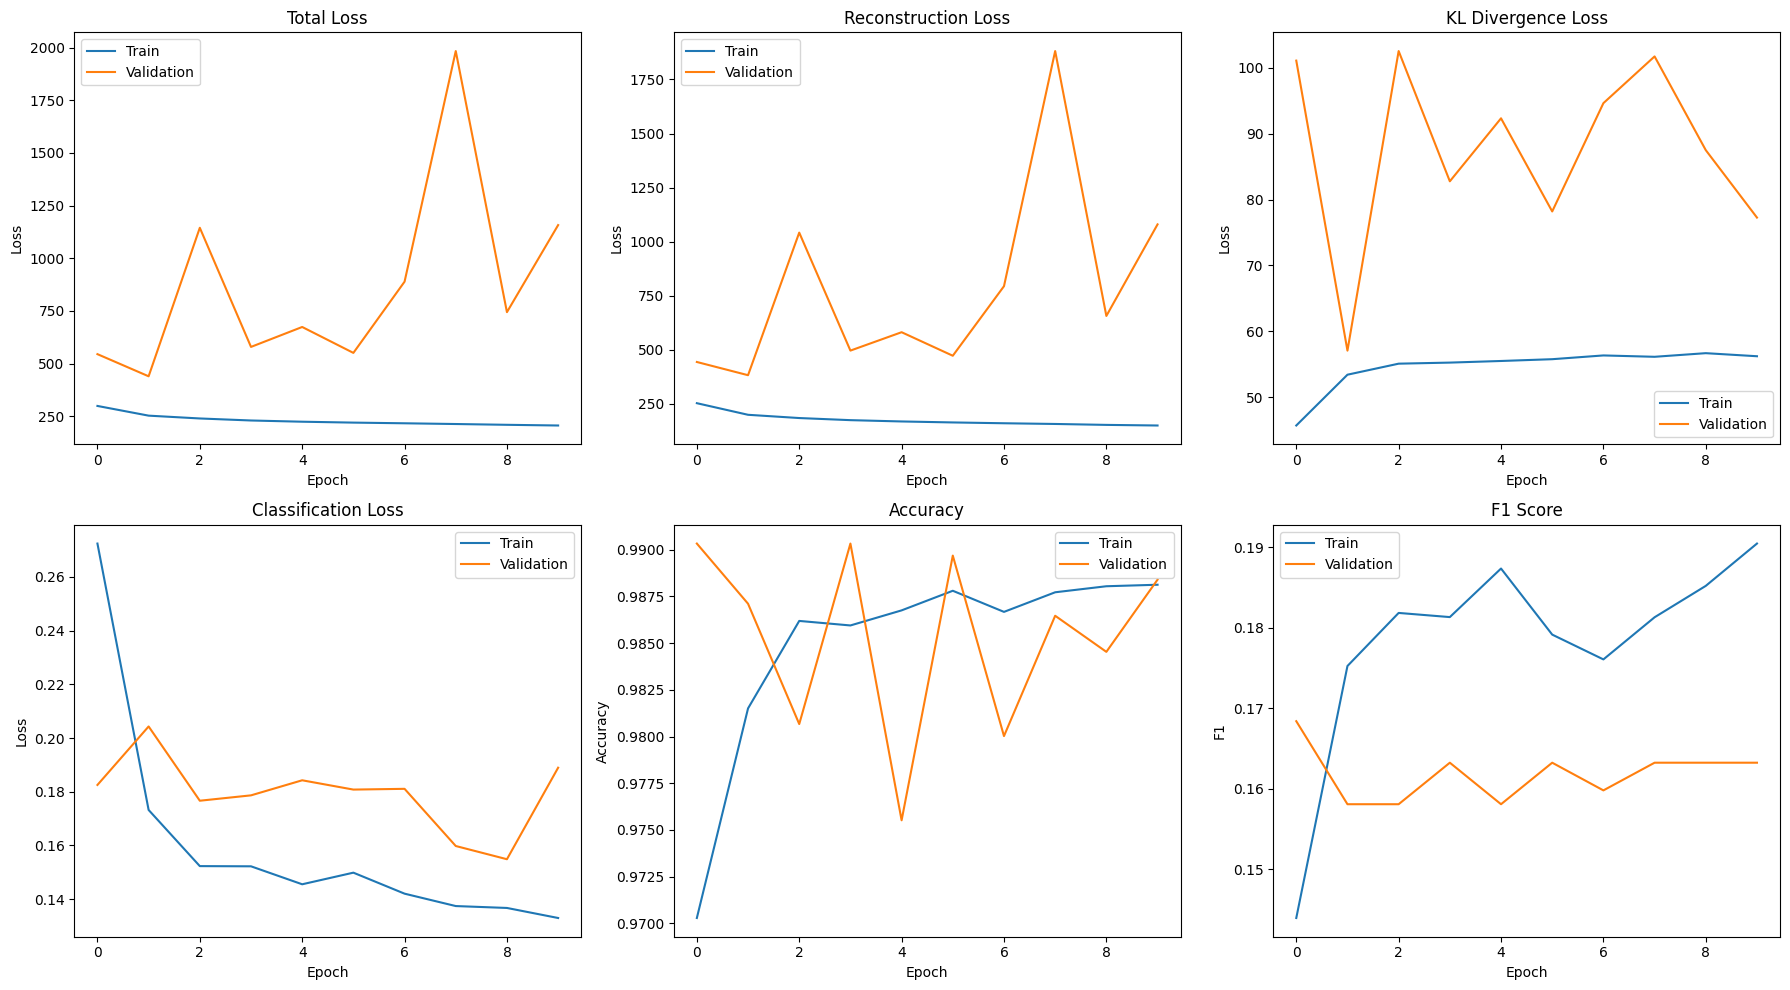

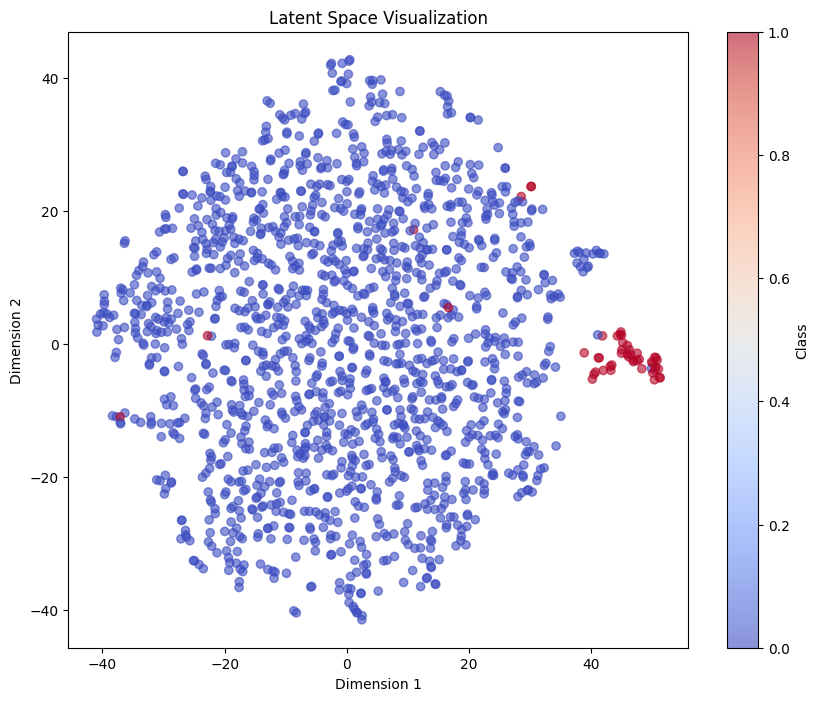

In [10]:
# Evaluate on test set
test_metrics = trainer.evaluate('test')

# Plot training history
trainer.plot_training_history()

# Plot latent space
trainer.plot_latent_space(data['dataloaders']['test'])

In [ ]:
# Evaluate on test set
test_metrics = trainer.evaluate('test')
print("\nTest Metrics:")
for key, value in test_metrics.items():
    if key != 'confusion_matrix':
        print(f"  {key}: {value:.4f}")
print(f"  Confusion Matrix:\n{test_metrics['confusion_matrix']}")

# Plot training history
trainer.plot_training_history()

# Plot latent space
trainer.plot_latent_space(data['dataloaders']['test'])

# Save the model
save_path = "../saved_models/vae_classifier/final_model.pt"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'metrics': trainer.metrics_history
}, save_path)
print(f"Model saved to {save_path}")